In [1]:
# Importing required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set_style('white')

In [2]:
# To ignoring any warning
warnings.filterwarnings('ignore')

In [3]:
# loading the dataset.
columns_names = ['user-id','item-id','rating','timestamp']
df = pd.read_csv('C:/Users/dines/Downloads/ml-100k/u.data' , sep = '\t',names = columns_names)

In [4]:
# getting movie title and id columns from the dataset
movies_titles = pd.read_csv('C:/Users/dines/Downloads/ml-100k/u.item', sep = '\|',header = None)
movies_titles = movies_titles[[0,1]]
# setting columns names.
movies_titles.columns = ['item-id','title']
movies_titles.head()


,item-id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [5]:
# knowing the data.

In [6]:
df.head()

,user-id,item-id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [7]:
df.shape

(100000, 4)

In [8]:
# unique users.

In [9]:
df['user-id'].nunique()

943

In [10]:
# unique movies
df['item-id'].nunique()

1682

In [11]:
# Merging the two dataset.
merge_df = pd.merge(df, movies_titles,on= 'item-id',sort= True)
merge_df.tail()

,user-id,item-id,rating,timestamp,title
99995,863,1678,1,889289570,Mat' i syn (1997)
99996,863,1679,3,889289491,B. Monkey (1998)
99997,863,1680,2,889289570,Sliding Doors (1998)
99998,896,1681,3,887160722,You So Crazy (1994)
99999,916,1682,3,880845755,Scream of Stone (Schrei aus Stein) (1991)


### Explolatory Data Analysis

In [12]:
# avg. rating of movies sorted in deceding order.
merge_df.groupby('title')['rating'].mean().sort_values(ascending = False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [13]:
# no. of ratings for a movie. 
merge_df.groupby('title').count()['rating'].sort_values(ascending=False)

title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
� k�ldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [14]:
ratings = pd.DataFrame(merge_df.groupby('title')['rating'].mean())
ratings['Num of ratings'] = pd.DataFrame(merge_df.groupby('title').count()['rating'])
ratings.sort_values(by='rating',ascending = False)

,rating,Num of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


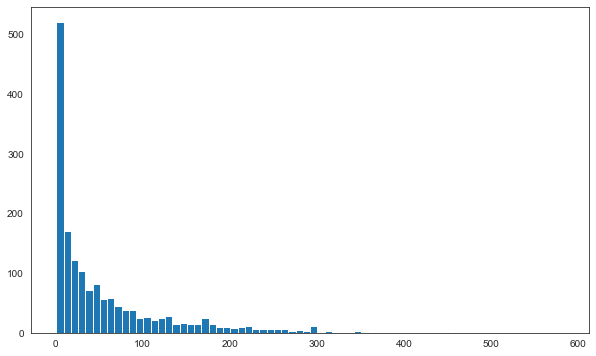

In [15]:
# Histogram
# X--How many times a movie is rated.
# Y-- How many times the rating occured in the dataset.

plt.figure(figsize = (10,6))
plt.hist(ratings['Num of ratings'],bins = 70)
plt.show()

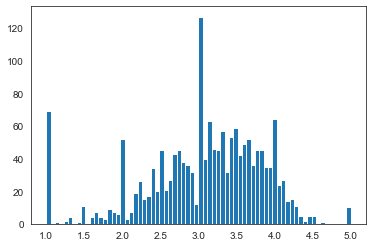

In [16]:
# X -- rating
# Y -- frequecy of ratings.
plt.hist(ratings['rating'],bins = 70 )
plt.show()

# it looks like normal distribution.

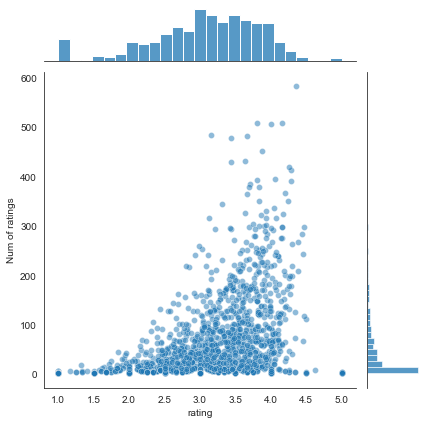

In [19]:
sns.jointplot(x=ratings['rating'] , y=ratings['Num of ratings'], data = 'ratings',alpha = 0.5)


we can see that if the avg. rating increases then no. of ratings also increses(no. of times a movie watched)

### Creating Movie Recommendation

In [22]:
# which movies has been rated by a user.
movie_matrix = merge_df.pivot_table(index = 'user-id',columns = 'title' , values = 'rating')
movie_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
user-id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Predict Function

In [32]:
def predict_movies(movie_name):
    movie_user_ratings = movie_matrix[movie_name]
    similar_to_movie = movie_matrix.corrwith(movie_user_ratings)
    
    # adding a correlation and converting it to dataframe.
    corr_movie = pd.DataFrame(similar_to_movie,columns = ['correlation'])
    corr_movie.dropna(inplace = True)
    
    corr_movie = corr_movie.join(ratings['Num of ratings'])
    predictions = corr_movie[corr_movie['Num of ratings']>100].sort_values('correlation',ascending = False)
    return predictions

In [33]:
# Making prediction
predictions = predict_movies('Titanic (1997)')
predictions.head()

,correlation,Num of ratings
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
